In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch

## 2 Trees and Random Forests
(a)

In [7]:
# load the data
pts = np.load('data02/data1d.npy')
labels = np.load('data02/labels1d.npy')

# TODO: Sort the points to easily split them
idx = np.argsort(pts)
sorted_pts=pts[idx]
labels = labels[idx]
N_tot = len(pts)

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate
def gini(p):
    #Compute the gini impurity. Each element of p is the probability that a new thing gets sorted to class i. In this case, there are only two classes
    return 1 - sum(p**2)

def H(p):
    #Computes the entropy
    return -sum(p *log(p))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
Ginis = np.zeros(N_tot-1)
Infogains = np.zeros(N_tot-1)
misclassrates = np.zeros(N_tot-1)


for i in range(1,N_tot):
    #create an array that represents the splits with 0 and 1
    nodes = np.zeros(N_tot)
    nodes[i:] = 1
    #calculate the probabilities for the classes 0 and 1
    p = np.array([(N_tot - sum(nodes))/N_tot , sum(nodes)/N_tot])

    #calculate the gini impurity:
    Ginis[i-1] = gini(p)
    #calculate the information gain:
    
    
# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)


(b)

In [35]:
# load the dijet data
features = np.load('data02/dijet_features_normalized.npy')
labels = np.load('data02/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

order = np.arange(len(labels))
np.random.seed(0)
np.random.shuffle(order)
features = features[:, order]
labels = labels[order]
train_features, val_features, test_features = features[:, :-400], features[:, -400:-200], features[:, -200:]
train_labels, val_labels, test_labels = labels[:-400], labels[-400:-200], labels[-200:]


(1833, 116)
(116, 1833)


In [25]:
from sklearn.ensemble import RandomForestClassifier

5
10
20
100


In [40]:
# TODO: train a random forest classifier for each combination of hyperparameters as specified on the sheet
#       and evaluate the performances on the validation set.
estimators = []
fits = []
scores = []


for n_trees in [5, 10, 20, 100]:
    for crit in ["gini", "entropy"]:
        for dep in [2, 5, 10, None]:
            clf = RandomForestClassifier(n_estimators=n_trees, criterion=crit,max_depth=dep)
            
            fits.append(clf.fit(train_features.T, train_labels))
            scores.append(clf.score(val_features.T, val_labels))
            estimators.append(clf)



In [41]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set
scores

[0.735,
 0.715,
 0.72,
 0.685,
 0.68,
 0.725,
 0.715,
 0.67,
 0.72,
 0.74,
 0.775,
 0.705,
 0.71,
 0.77,
 0.77,
 0.74,
 0.72,
 0.74,
 0.74,
 0.75,
 0.725,
 0.75,
 0.76,
 0.75,
 0.72,
 0.76,
 0.755,
 0.77,
 0.73,
 0.745,
 0.75,
 0.765]

# 3) Fits

(b)

 final_simplex: (array([[9.02015759],
       [9.02015765]]), array([1.19173189e+10, 1.19173189e+10]))
           fun: 11917318940.033943
       message: 'Optimization terminated successfully.'
          nfev: 82
           nit: 41
        status: 0
       success: True
             x: array([9.02015759])

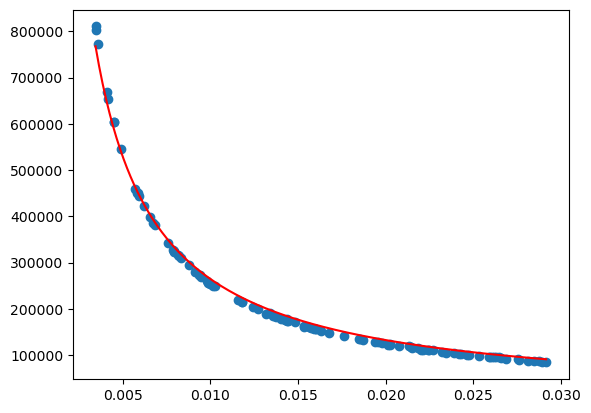

In [43]:
from scipy.optimize import minimize

data_Vm, data_p = np.load("data02/gas.npy")
T_room = 293

# TODO: Implement the ideal gas law
def ideal_gas(R, T, V):
    return R*T / V


# TODO: Implement the negative log-likelihood
def MSE(R):
    return np.sum((data_p - ideal_gas(R, T_room, data_Vm))**2)


# TODO: Perform the fit, print the results

res = minimize(MSE, x0=[0], method="Nelder-Mead")
R_est = res.x
Like = res.fun

# TODO: Visualize your results
V_arr = np.arange(min(data_Vm), max(data_Vm), 0.0001)

fig, ax = plt.subplots()
ax.scatter(data_Vm, data_p)
ax.plot(V_arr, ideal_gas(R_est, T_room, V_arr), color="r")
res



(c)

 final_simplex: (array([[9.02015759],
       [9.02015765]]), array([1.19173189e+10, 1.19173189e+10]))
           fun: 11917318940.033943
       message: 'Optimization terminated successfully.'
          nfev: 82
           nit: 41
        status: 0
       success: True
             x: array([9.02015759])

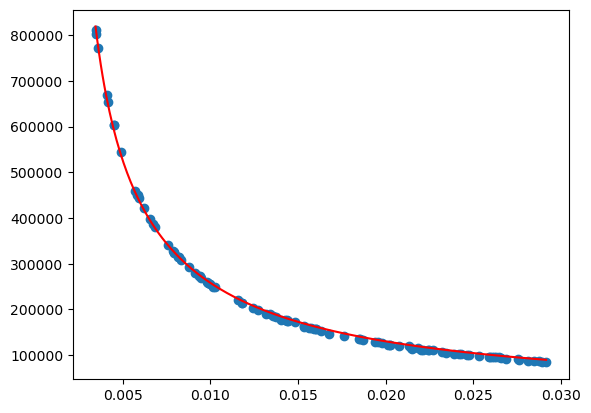

In [57]:
# TODO: Implement the real gas law
def real_gas(R, T, a, b, V):
    return R*T /(V - b) - a/ V**2

# TODO: Implement the negative log-likelihood
def MSE_real(ab):
    return np.sum((data_p - real_gas(R_est, T_room,ab[0],ab[1], data_Vm))**2)


# TODO: Perform the fit, print the results
res_real = minimize(MSE_real, x0=[0.,0.],  method="Nelder-Mead")

Like_real = res_real.fun
a_res, b_res = res_real.x
# TODO: Visualize your results
fig, ax = plt.subplots()
ax.scatter(data_Vm, data_p)
ax.plot(V_arr, real_gas(R_est, T_room,a_res, b_res, V_arr), color="r")


In [59]:
Like/Like_real

4.361094811788405

The negative log likelihood is smaller for the real gas